# Arbeiten mit Graustufenbildern

Reduziert die Datenmenge um Faktor 3 (kein R, G, B – nur Intensität).
Viele klassische Algorithmen (Kanten, Texturen, Gesichtererkennung) interessieren sich nur für Helligkeitsunterschiede, nicht für Farben

Dimension der Matrix: (Höhe * Breite). Keine Tiefe.

Jeder Pixel ist ein Skalar (eine einzelne Zahl) mit Wertebereich:

0 = Schwarz (Kein Licht) bis 255 = Weiß (Volle Intensität).

Dazwischen Grautöne (254 shades of grey bei 8 bit)



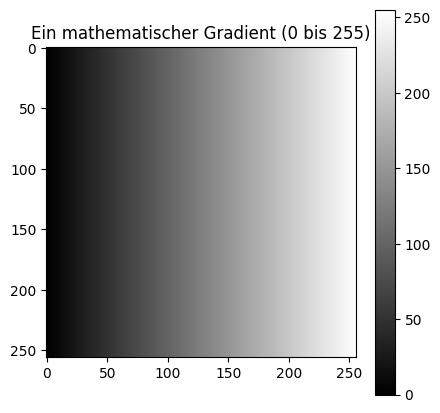

In [8]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Wir erschaffen eine Matrix (Leinwand) mit Nullen (Schwarz)
# Größe: 256 Pixel breit, 256 Pixel hoch
image_gray = np.zeros((256, 256), dtype="uint8")

# 2. Wir füllen das Bild mit Mathematik
# Wir wollen, dass die Helligkeit von links (0) nach rechts (255) zunimmt.
for row in range(256):
    for col in range(256):
        image_gray[row, col] = col  # Der Spalten-Index ist die Helligkeit!

# 3. Anzeigen
plt.figure(figsize=(5, 5))
# WICHTIG: cmap='gray' ist Pflicht, sonst macht Matplotlib das Bild bunt (Heatmap)!
plt.imshow(image_gray, cmap='gray')
plt.title("Ein mathematischer Gradient (0 bis 255)")
plt.colorbar() # Zeigt die Legende an
plt.show()

# Reflexionsfrage an die Studierenden:
# "Warum ist das Bild vertikal gleichförmig?" -> Weil wir 'row' in der Zuweisung ignorieren.



Shape des Graustufenbildes: (764, 960)


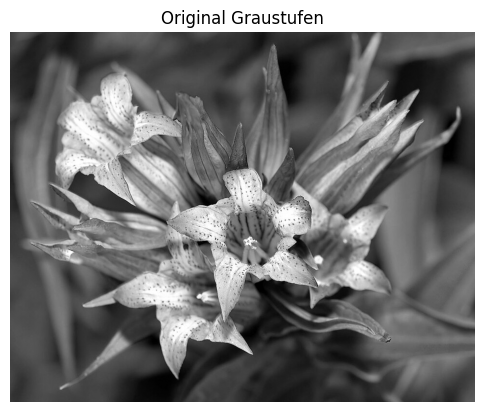

In [9]:
# 1. Bild laden (Wir laden ein Beispielbild aus dem Internet oder lokal)
image_array = cv2.imread('Gentiana_asclepiadea_gray2.jpg', cv2.IMREAD_GRAYSCALE)
# WICHTIG: Flag IMREAD_GRAYSCALE sorgt dafür, dass OpenCV Farben sofort verwirft

if image_array is None:
    raise ValueError("Could not read image file")

print(f"Shape des Graustufenbildes: {image_array.shape}")
# Ausgabe z.B.: (600, 600) -> Beachten Sie: Keine 3 am Ende!

plt.figure(figsize=(6, 6))
plt.imshow(image_array, cmap='gray')
plt.title("Original Graustufen")
plt.axis("off")
plt.show()

# Bild invertieren (Negativ erstellen)

Da wir numpy nutzen, passiert das element-wise für alle Pixel gleichzeitig

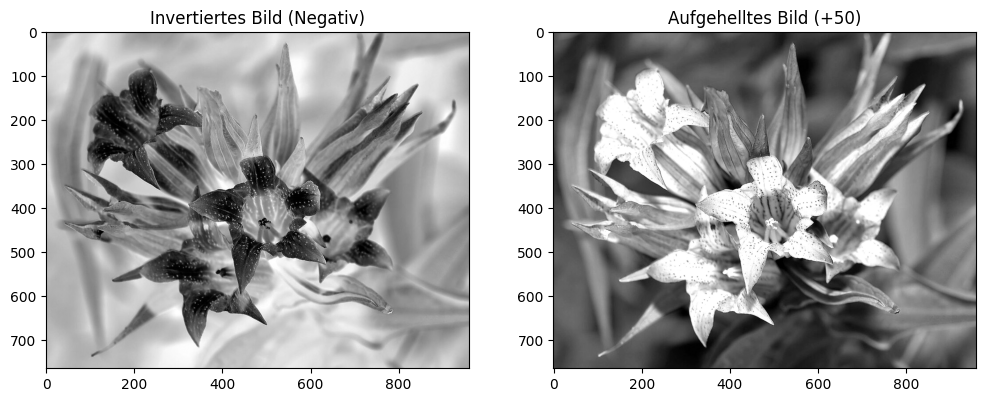

In [10]:
img_inverted = 255 - image_array

# Wir können auch Helligkeit manipulieren (Aufhellen)
# Achtung: cv2.add nutzen wegen Overflow-Schutz!
img_bright = cv2.add(image_array, 50)

# Darstellung
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_inverted, cmap='gray')
plt.title("Invertiertes Bild (Negativ)")

plt.subplot(1, 2, 2)
plt.imshow(img_bright, cmap='gray')
plt.title("Aufgehelltes Bild (+50)")

plt.show()

# Das einfachste "Computer Vision" Modell (Binarisierung)

Wir wollen den Hintergrund entfernen. Dafür nutzen wir einen einfachen Schwellenwert (Threshold)

Dunkelster Pixel: 0
Hellster Pixel: 255
Durchschnitt: 100.07


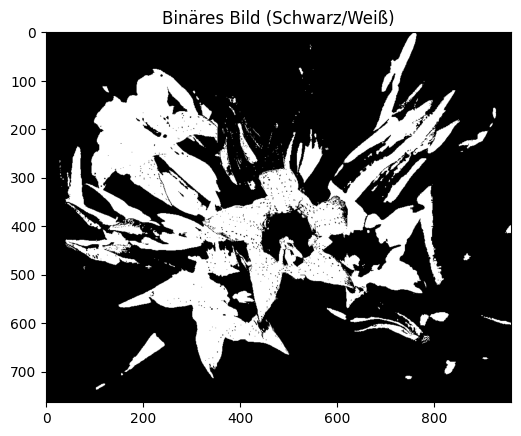

In [11]:

# Wir schauen uns kurz die Statistik an
print(f"Dunkelster Pixel: {image_array.min()}")
print(f"Hellster Pixel: {image_array.max()}")
print(f"Durchschnitt: {image_array.mean():.2f}")

# Thresholding: Alles über 127 wird Weiß (255), alles darunter Schwarz (0)
# ret ist der verwendete Schwellenwert, thresh_img ist das Ergebnisbild
ret, thresh_img = cv2.threshold(image_array, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(thresh_img, cmap='gray')
plt.title("Binäres Bild (Schwarz/Weiß)")
plt.show()

# Umgang mit Farbbildern

Wir sehen uns RGB vs BGR an und wie mit Hues umgegangen wird

Bild-Typ: <class 'numpy.ndarray'>
Dimensionen (H, W, C): (532, 800, 3)
Datentyp: uint8
Anzahl Pixel: 425600


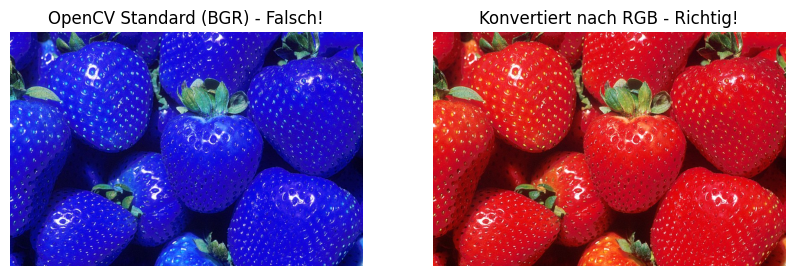

In [12]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Bild laden

img_bgr = cv2.imread("800px-Strawberries.jpg", cv2.IMREAD_COLOR)

# Überprüfung der Dimensionen
print(f"Bild-Typ: {type(img_bgr)}")
print(f"Dimensionen (H, W, C): {img_bgr.shape}")
print(f"Datentyp: {img_bgr.dtype}")

# Aufgabe an Studierende: Wie viele Pixel hat das Bild insgesamt?
total_pixels = img_bgr.shape[0] * img_bgr.shape[1]
print(f"Anzahl Pixel: {total_pixels}")

# Die BGR-Falle & Visualisierung
# OpenCV liest BGR, Matplotlib erwartet RGB.

plt.figure(figsize=(10, 5))

# Falsche Darstellung (BGR direkt plotten)
plt.subplot(1, 2, 1)
plt.imshow(img_bgr)
plt.title("OpenCV Standard (BGR) - Falsch!")
plt.axis("off")

# Korrekte Darstellung (Konvertierung)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 2)
plt.imshow(img_rgb)
plt.title("Konvertiert nach RGB - Richtig!")
plt.axis("off")

plt.show()

Ein 5x5 Ausschnitt der Rot-Kanals (Werte 0-255):
[[193 198 183 188 184]
 [182 186 192 188 183]
 [185 190 187 185 183]
 [189 192 180 185 184]
 [182 179 184 194 185]]


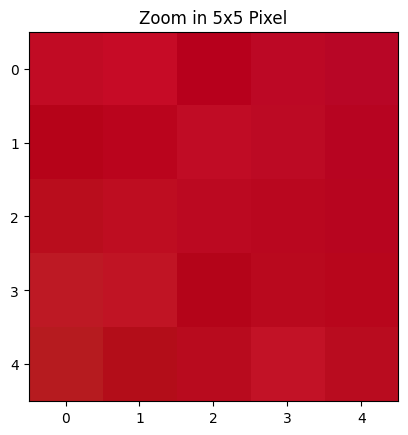

In [13]:
# Blick in die Matrix (Der "Zoom")
# Wir schauen uns die rohen Zahlenwerte eines kleinen Ausschnitts an. Das ist wichtig für das Verständnis von 'uint8'
# Wir schneiden einen winzigen Bereich aus (z.B. 5x5 Pixel)
# Wählen Sie einen Bereich, der rot ist (Erbeere)
roi = img_rgb[200:205, 300:305]

print("Ein 5x5 Ausschnitt der Rot-Kanals (Werte 0-255):")
print(roi[:, :, 0]) # Nur der R-Kanal

plt.imshow(roi)
plt.title("Zoom in 5x5 Pixel")
plt.show()

# DISKUSSION:
# Seht ihr hohe Werte (>200) im Rot-Kanal?
# Das bedeutet "viel Rot".

# Histogramm-Analyse

Wir vergleichen die Farbverteilung.

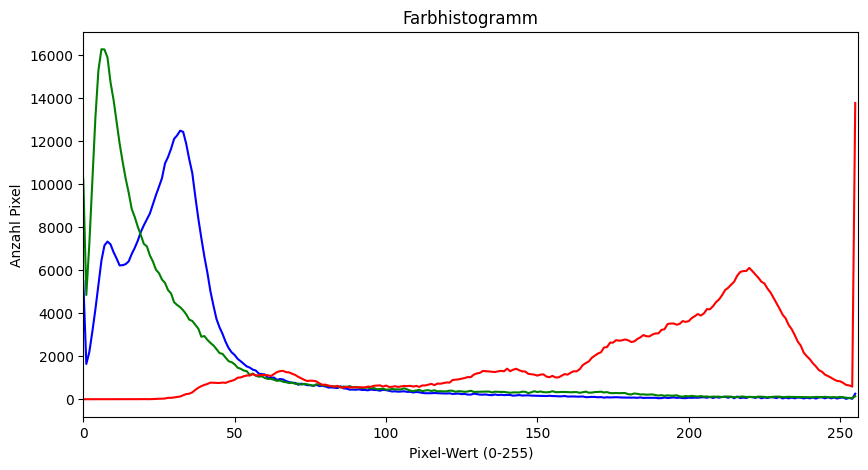

In [14]:

colors = ('b', 'g', 'r') # OpenCV Reihenfolge!

plt.figure(figsize=(10, 5))
plt.title("Farbhistogramm")
plt.xlabel("Pixel-Wert (0-255)")
plt.ylabel("Anzahl Pixel")

for i, color in enumerate(colors):
    # cv2.calcHist([Bild], [Kanal], Maske, [Bins], [Range])
    hist = cv2.calcHist([img_bgr], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.show()

# Die Aufgabe – "Finde das Rote!" (RGB vs. HSV)

Das ist der Kern der Übung. Wir versuchen, die Erdbeeren zu isolieren.
# Versuch A: Im RGB Raum (Schwierig)
Wir definieren: Alles was viel Rot und wenig Blau/Grün hat, ist eine Erdbeere.

$R > 150 \text{ UND }  G < 100 \text{ UND } B < 100$

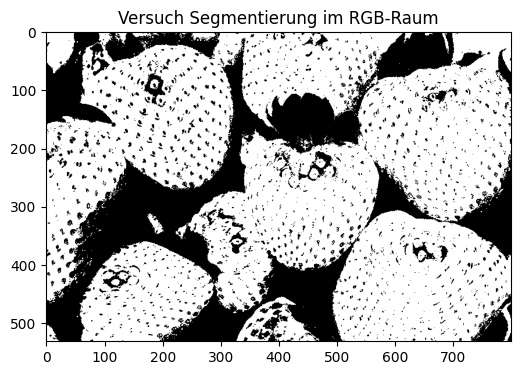

In [15]:
# Einfaches Thresholding im RGB Raum (Vektorisiert mit NumPy)
# Achtung: img_rgb ist (R, G, B)
mask_rgb = (img_rgb[:,:,0] > 150) & (img_rgb[:,:,1] < 100) & (img_rgb[:,:,2] < 100)

plt.figure(figsize=(6,6))
plt.imshow(mask_rgb, cmap='gray')
plt.title("Versuch Segmentierung im RGB-Raum")
plt.show()

# Fazit: Funktioniert okay, aber Teile im Schatten werden oft nicht erkannt.
# Helle weiße Stellen (Lichtreflexionen) werden oft falsch erkannt.

# Versuch B: Im HSV Raum (Professionell)

Wir konvertieren und nutzen den Farbton (Hue).


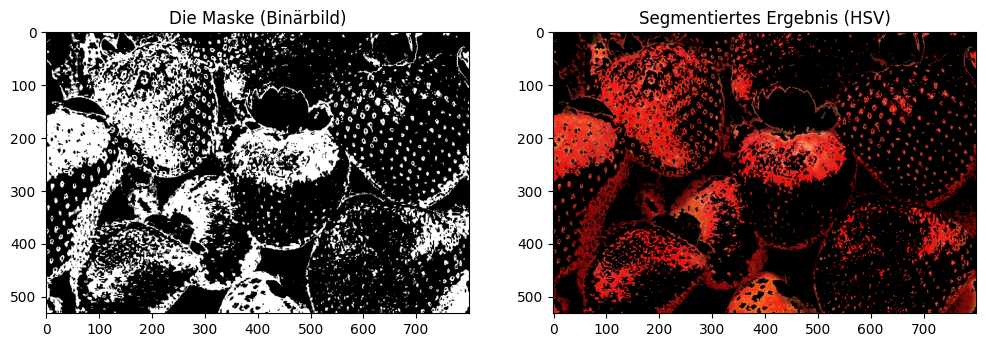

In [16]:
# 1. Konvertierung BGR zu HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# 2. Definition der Farbe "Rot" im HSV-Raum
# Rot liegt in OpenCV bei Hue 0-10 UND 170-180 (Wrap-around)
# Wir nehmen hier den unteren Bereich:
lower_red = np.array([0, 120, 70])   # Hue min, Saturation min, Value min
upper_red = np.array([10, 255, 255]) # Hue max, Saturation max, Value max

# 3. Erstellen der Maske
mask_hsv = cv2.inRange(img_hsv, lower_red, upper_red)

# 4. Ergebnis anzeigen
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(mask_hsv, cmap='gray')
plt.title("Die Maske (Binärbild)")

# Wir legen die Maske über das Originalbild ("Bitwise AND")
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_hsv)

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Segmentiertes Ergebnis (HSV)")
plt.show()

Was passiert, wenn wir uint8 verlassen?

Addieren Sie 50 auf das Originalbild.

Was passiert mit den hellen Stellen?


Text(0.5, 1.0, 'Helles Bild')

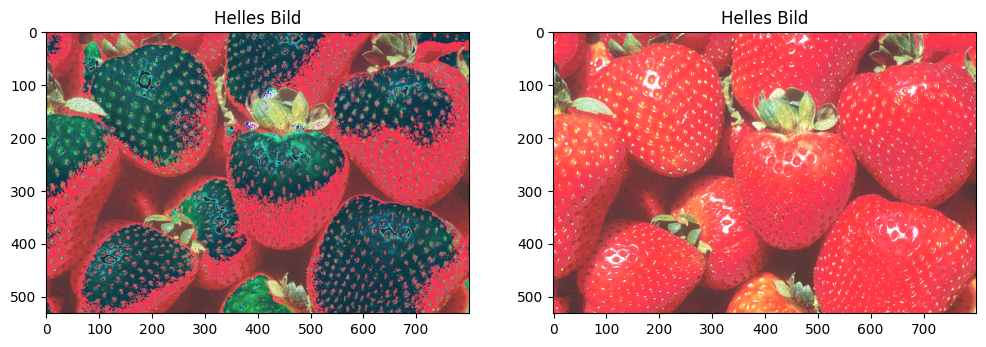

In [17]:

helleres_bild = img_bgr + 50

helleres_bild_rgb = cv2.cvtColor(helleres_bild, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(helleres_bild_rgb)
plt.title("Helles Bild")

# Es entstehen seltsame schwarze Artefakte (Overflow $255 + 1 \rightarrow 0$).

helleres_bild2 =cv2.add(img_bgr , 50)
helleres_bild2_rgb = cv2.cvtColor(helleres_bild2, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2)
plt.imshow(helleres_bild2_rgb)
plt.title("Helles Bild")


# Aufgaben für die Studierenden

1. Ändern Sie den Code so, dass nur das Grün der Blätter erkannt wird!

**Tipp**: Hue für Grün liegt in OpenCV etwa bei 40–80.

2. Erklären Sie, warum die RGB-Maske 'pixeliger' oder lückenhafter als die HSV-Maske, besonders in Schattenbereichen ist

